# Simulating Geometric Brownian Motion (GBM)
Geometric Brownian Motion (GBM) $X = \{X_{t}\}_{t\geq0}$ satsifies the following Stochastic Differential Equation (SDE):

### $dX_{t} = \mu X_{t} dt + \sigma X_{t} dZ_{t}$

Integrated Form:

- $\log X_{t} = \log X_{0} + \int_{0}^{t}(\mu -\frac{\sigma^{2}}{2})ds + \int_{0}^{t}\sigma dZ_{t}$


- $\log X_{t} = \log X_{0} + (\mu -\frac{\sigma^{2}}{2})t + \sigma Z_{t}$


- $\log X_{t} \sim \mathcal{N}(\log X_{0} + (\mu -\frac{\sigma^{2}}{2})t, \sigma^{2} t)$

Explicit Expression:
### $X_{t} = X_{0}e^{(\mu -\frac{\sigma^{2}}{2})t + \sigma Z_{t}}$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from symbulate import *

### Paramteters

In [2]:
# Constants
mu = 0.1            # Drift coefficient
n = 200             # Number of steps
T = 1               # Time in years
M = 4               # Number of simulations
X0 = 100            # Initial stock price
dt = T / n          # Time step size
sigma = 0.3         # Volatility

### Simulating GBM Paths

In [3]:
# simulation using numpy arrays
Xt = np.exp(
    (mu - sigma ** 2 / 2) * dt
    + sigma * np.random.normal(0, np.sqrt(dt), size=(M,n)).T
)

# include array of 1's
Xt = np.vstack([np.ones(M), Xt])

# multiply through by X0 and return the cumulative product of elements along a given simulation path (axis=0).
Xt = X0 * Xt.cumprod(axis=0)

### Consider time intervals in years

In [4]:
# Define time interval correctly
time = np.linspace(0,T,n+1)

# Require numpy array that is the same shape as Xt
tt = np.full(shape=(M,n+1), fill_value=time).T

### Plotting Results

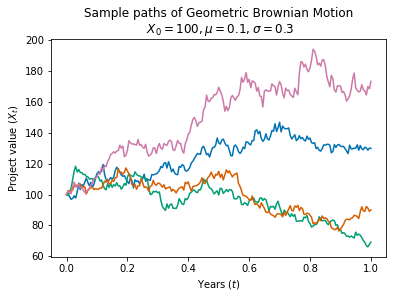

In [5]:
plt.plot(tt, Xt)
plt.xlabel("Years $(t)$")
plt.ylabel("Project value $(X_t)$")
plt.title(
    "Sample paths of Geometric Brownian Motion\n $X_0 = {0}, \mu = {1}, \sigma = {2}$".format(X0, mu, sigma)
)
plt.show()

## Simulating one GBM path for different volatilities $\sigma$ 

In [6]:
# Constants
mu = 0.1       # Drift
n = 200        # Number of steps
T = 1          # Time in years
dt = T/n       # Time step size
x0 = 100       # Initial value
np.random.seed(1)  # Seed for reproducibility

 # Sigma values
sigma = np.array([0.01, 0.05, 0.1, 0.2])

# Simulating the GBM
x = np.exp(
    (mu - sigma ** 2 / 2) * dt
    + sigma * np.random.normal(0, np.sqrt(dt), size=(len(sigma), n)).T
)
x = np.vstack([np.ones(len(sigma)), x])
x = x0 * x.cumprod(axis=0)

# Time scale
time = np.linspace(0, n * dt, n + 1)

### Plotting results

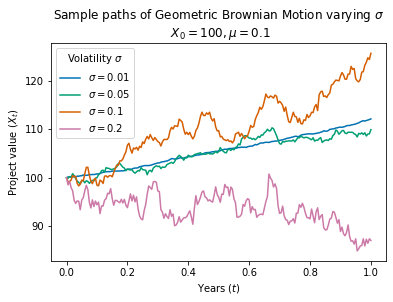

In [7]:
for i in range(len(sigma)):
    plt.plot(time, x[:, i], label=f'$\sigma={np.round(sigma[i], 2)}$')
plt.xlabel("Years $(t)$")
plt.ylabel("Project value $(X_t)$")
plt.title("Sample paths of Geometric Brownian Motion varying $\sigma$\n $X_0 = {0}, \mu = {1}$".format(X0, mu))
plt.legend(title="Volatility $\sigma$")
plt.show()

# Simulating Poisson Process (PP)
define $N_t$ as the total number of environmental incidents up to any given time $t\in\mathbb{R}_{\geq0}$. The process $\{N_{t}\}_{t \geq 0}$ is modeled as a Poisson process (PP): 
- $N_{0} = 0.$ 
- The process $\{N_{t}\}_{t \geq 0}$ has independent increments.
- The number of events in any time interval of length $t$ is Poisson distributed with mean $\lambda t.$ That is, $N_{(s, s+t]}\sim Poi(\lambda t)$ for all $t,s\geq0$: $\mathbb{P}(N_{(s, s+t]} = k) = e^{-\lambda t}\frac{(\lambda t)^{k}}{k!}, \text{ } k\in\mathbb{N}.$

### Function to simulate Poisson process paths

In [8]:
def simulate_poisson_process(lam, T, num_paths):
    """Simulate Poisson process sample paths."""
    paths = []
    for _ in range(num_paths):
        time, event_count = 0, 0
        path = [[time, event_count]]
        # Simulate Poisson process
        while time <= T:
            time += np.random.exponential(1 / lam)
            event_count += 1
            if time > T:
                break
            path.append([time, event_count])
        # Ensure the last event stops exactly at T
        if path[-1][0] < T:
            path.append([T, path[-1][1]])  # Extend to T without increasing the count
        paths.append(np.array(path))
    return paths

### Parameters

In [9]:
lambdas = [0.2, 0.5, 1, 2]                    # Different rates for the Poisson process
T = 100                                       # Observation period
num_paths = 8                                 # Number of paths for each rate
colors = ['blue', 'green', 'purple', 'grey']  # Colors for each lambda

### Plotting results

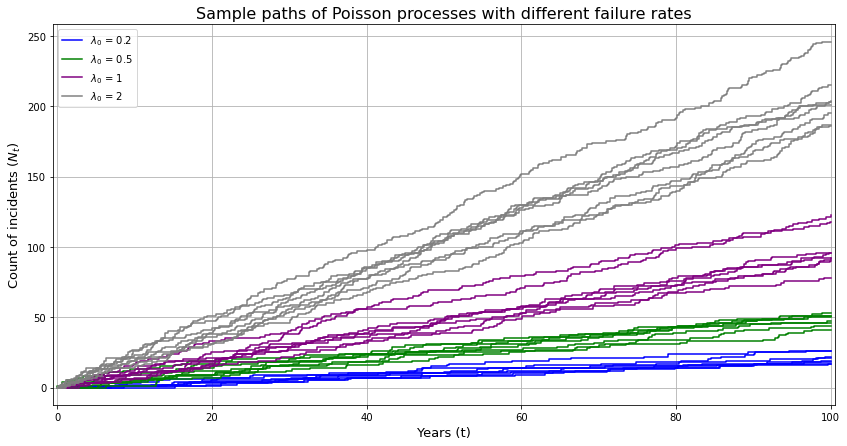

In [10]:
# Set up the plot
plt.figure(figsize=(14, 7))

# Simulate and plot the Poisson process for each rate lambda
for i, lam in enumerate(lambdas):
    color = colors[i]
    for path in simulate_poisson_process(lam, T, num_paths):
        plt.step(path[:, 0], path[:, 1], where='post', label=f'$\lambda_{0}$ = {lam}', color=color)

# Configure plot
plt.title('Sample paths of Poisson processes with different failure rates', fontsize=16)
plt.xlabel('Years (t)', fontsize=13)
plt.ylabel('Count of incidents ($N_{t}$)', fontsize=13)
plt.xlim(-0.5, T+0.5)
# Create custom legends        
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.grid(True)
#plt.savefig('PP_paths_lambda', facecolor='w', bbox_inches='tight')
plt.show()